# <b>imshow</b>

This section describes various options available for imshow plots in **fivecentplots**

See the full API https://endangeredoxen.github.io/fivecentplots/0.6.0/api/imshow.html#imshow

## Setup

Import packages:

In [1]:
import fivecentplots as fcp
import pandas as pd
from pathlib import Path
import imageio.v3 as imageio

Read this utterly ridiculous, yet completely perfect, image from the world wide web:

<img src="https://imagesvc.meredithcorp.io/v3/mm/image?q=85&c=sc&rect=0%2C214%2C2000%2C1214&poi=%5B920%2C546%5D&w=2000&h=1000&url=https%3A%2F%2Fstatic.onecms.io%2Fwp-content%2Fuploads%2Fsites%2F47%2F2020%2F10%2F07%2Fcat-in-pirate-costume-380541532-2000.jpg" width="600" align="left">

In [2]:
url = 'https://imagesvc.meredithcorp.io/v3/mm/image?q=85&c=sc&rect=0%2C214%2C2000%2C1214&poi=%5B920%2C546%5D&w=2000&h=1000&url=https%3A%2F%2Fstatic.onecms.io%2Fwp-content%2Fuploads%2Fsites%2F47%2F2020%2F10%2F07%2Fcat-in-pirate-costume-380541532-2000.jpg'
img_rgb = imageio.imread(url)
img_rgb

array([[[216, 217, 219],
        [216, 217, 219],
        [216, 217, 219],
        ...,
        [211, 213, 212],
        [211, 213, 212],
        [211, 213, 212]],

       [[216, 217, 219],
        [216, 217, 219],
        [216, 217, 219],
        ...,
        [211, 213, 212],
        [211, 213, 212],
        [211, 213, 212]],

       [[216, 217, 219],
        [216, 217, 219],
        [216, 217, 219],
        ...,
        [210, 212, 211],
        [210, 212, 211],
        [210, 212, 211]],

       ...,

       [[ 57,  45,  31],
        [ 57,  45,  31],
        [ 56,  44,  30],
        ...,
        [205, 205, 205],
        [205, 205, 205],
        [205, 205, 205]],

       [[ 58,  46,  32],
        [ 58,  46,  32],
        [ 57,  45,  31],
        ...,
        [205, 205, 205],
        [205, 205, 205],
        [205, 205, 205]],

       [[ 58,  46,  32],
        [ 58,  46,  32],
        [ 58,  46,  32],
        ...,
        [205, 205, 205],
        [205, 205, 205],
        [205, 205, 205]]

This test image is an 8-bit RGB color image.  <b>fivecentplots</b> has support for both RGB and single-channel RAW images, so we will also convert this image to a grayscale RAW for future examples using a <b>fivecentplots</b> utility function:

In [3]:
img_raw = fcp.utilities.img_grayscale(img_rgb)
img_raw.head()

0         1         2         3         4         5         6     \
0  216.9074  216.9074  216.9074  216.9074  216.9074  216.9074  216.9074   
1  216.9074  216.9074  216.9074  216.9074  216.9074  216.9074  216.9074   
2  216.9074  216.9074  216.9074  216.9074  216.9074  216.9074  216.9074   
3  216.9074  216.9074  216.9074  216.9074  216.9074  216.9074  216.9074   
4  216.9074  216.9074  216.9074  216.9074  216.9074  216.9074  216.9074   

       7         8         9     ...      1490      1491      1492      1493  \
0  216.9074  216.9074  216.9074  ...  211.2670  211.2670  212.2669  213.2668   
1  216.9074  216.9074  216.9074  ...  211.2670  212.2669  212.2669  213.2668   
2  216.9074  216.9074  216.9074  ...  211.2670  212.2669  213.2668  213.2668   
3  216.9074  216.9074  216.9074  ...  212.2669  212.2669  213.2668  213.2668   
4  216.9074  216.9074  216.9074  ...  213.2668  213.2668  213.2668  213.2668   

       1494      1495      1496      1497      1498      1499  
0  213.2668  214.2667  212.2669  212.2669  212.2669  212.2669  
1  213.2668  214.2667  212.2669  212.2669  212.2669  212.2669  
2  213.2668  214.2667  211.2670  211.2670  211.2670  211.2670  
3  213.2668  214.2667  211.2670  211.2670  211.2670  211.2670  
4  213.2668  213.2668  211.2670  211.2670  211.2670  211.2670  

[5 rows x 1500 columns]

Optionally set the design theme (skipping here and using default):

In [4]:
#fcp.set_theme('gray')
#fcp.set_theme('white')

## Basic image display

### Input data format

In general, <b>fivecentplots</b> was designed to simplify plotting from 2D `pandas.DataFrame` objects.  For convenience, a small number of plotting modules, including `fcp.imshow` also support `numpy.ndarray` objects for plotting.  Image data is structured as a 2D array of pixel values, each containing one or more color channels.  An image with single channel pixel values (such as a RAW Bayer image) can fit nicely into a 2D `DataFrame`.  Multi-channel image data (like color RGB) is more difficult to store in a `DataFrame` since `DataFrame` cells aren't designed to store an array of values.  For single images, it is simple enough to convert the input data into a `numpy.ndarray` and pass to the backend plotting engine.  However, to enable <b>fivecentplots</b> powerful grouping / filtering / automatic-color-plane-splitting functionality for sets of images, we have to transform the input data under the hood into a move convenient format.  The art of building `DataFrames` of multiple images will be described later in <a href="imshow.html#grouped-images">Grouped Images</a>.  Our first examples will deal with single images.

### RAW example

First, we display the single-channel RAW grayscale image computed above.  Here, the input image data here is a 2D `DataFrame` where the column labels are integer values representing the column number in the array:

<div class="admonition note">
<p class="admonition-title"></p>
<p>Notes: 

(1) unless explicitly defined, the width to height ratio of the original image is preserved regardless of the values of `ax_size`; by default the image will scale to largest of the two dimensions

(2) tick labels are disable by default for `imshow` (use `tick_labels_major=True` to enable)</p>
    
(3) imshow uses the "gray" colormap by default for single-channel RAW images
</div>

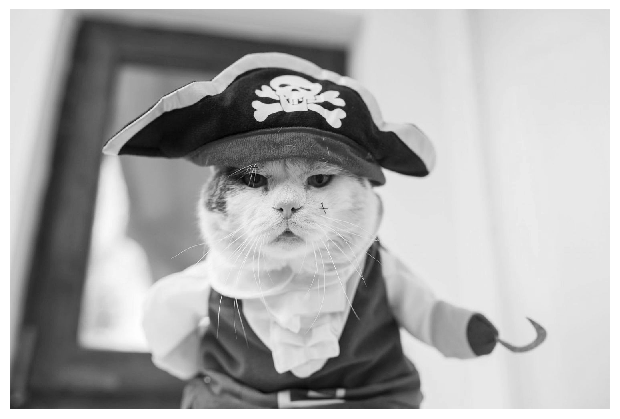

In [5]:
fcp.imshow(img_raw, ax_size=[600, 600])

### RGB example

The RGB version of our cat pirate can also be plotted.  Here, the input image data here is numpy array of shape `(1000, 1500, 3)`:

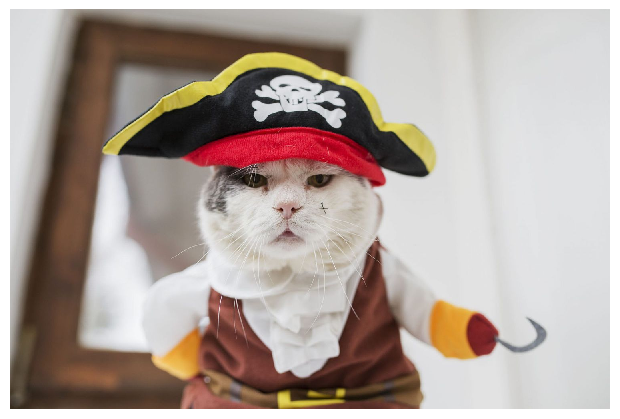

In [6]:
fcp.imshow(img_rgb, ax_size=[600, 600])

## Colors

This section applies only to single-channel image data

### Color map

We can add any standard color map from matplotlib to an image using keyword `cmap`:

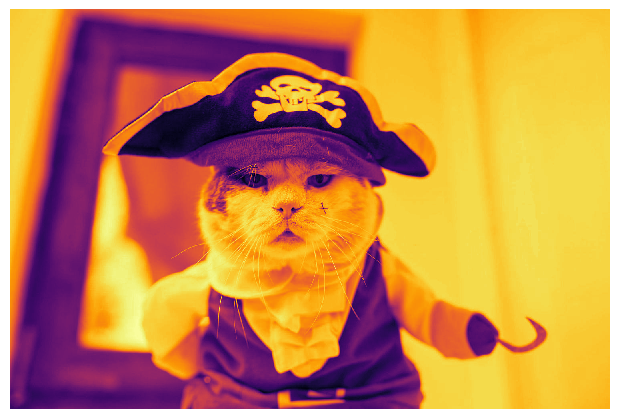

In [7]:
fcp.imshow(img_raw, cmap='inferno', ax_size=[600, 600])

### Colorbar

We can also add a colorbar to the image showing the z-range with the keyword `cbar=True`

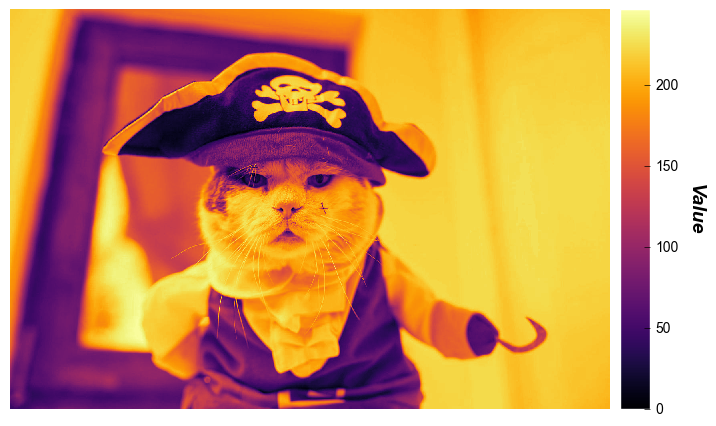

In [8]:
fcp.imshow(img_raw, cmap='inferno', ax_size=[600, 600], cbar=True)

## Cropping

For both single and multi-channel images, we can crop (i.e., zoom in) the image by applying `x` and `y` limits.  Note:

* `x` applies to the image columns
* `y` applies to the image rows
* image data follows the common convention of starting with "row 0" at the top of the image &rarr; `y` values increase from top to bottom

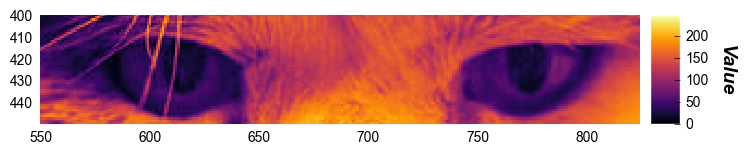

In [9]:
fcp.imshow(img_raw, cmap='inferno', cbar=True, ax_size=[600, 600], xmin=550, xmax=825, ymin=400, ymax=450, tick_labels_major=True)

<i> private eyes are watching you... </i>

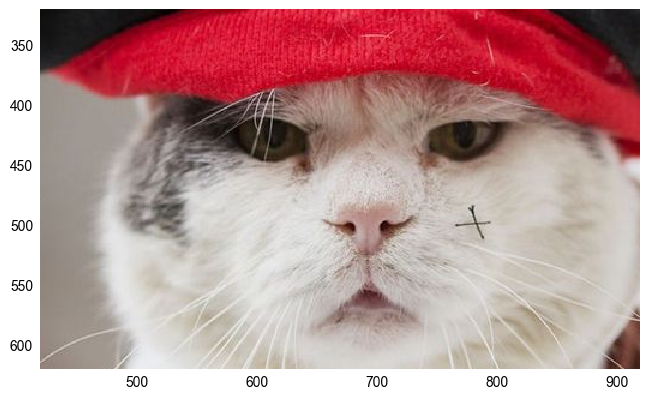

In [10]:
fcp.imshow(img_rgb, ax_size=[600, 600], xmin=420, xmax=920, ymin=320, ymax=620, tick_labels_major=True)

## Contrast stretching

This section applies only to single-channel image data
<br><br>

In some cases (such as RAW image sensor data analysis) it is helpful to adjust the colormap limits in order to "stretch" the contrast.  This can be done via the `z` axis limits.  In this example, we stretch +/-3 standard deviations from the mean pixel value.

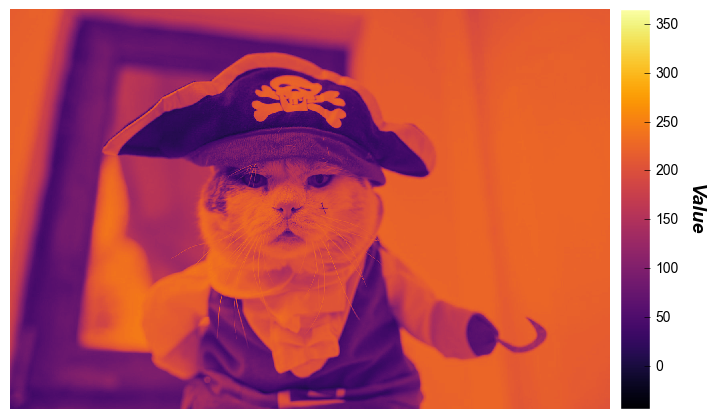

In [11]:
# First calculate the mean and std to help define stretching limits
uu = img_raw.stack().mean()
ss = img_raw.stack().std()

# Plot with stretching
fcp.imshow(img_raw, cmap='inferno', cbar=True, ax_size=[600, 600], zmin=uu-3*ss, zmax=uu+3*ss)

imshow plots in <b>fivecentplots</b> also provides a convenient kwarg called `stretch` which calculates a numerical multiplier of the standard deviation above and below the mean to set new z-limits (essentially the same thing as done above manually).  `stretch` can be a single value of std dev which is interpreted as +/- that value or a 2-value list with the lower and higher std deviation respectively.  First, we consider a +/- 4 sigma stretch as above:

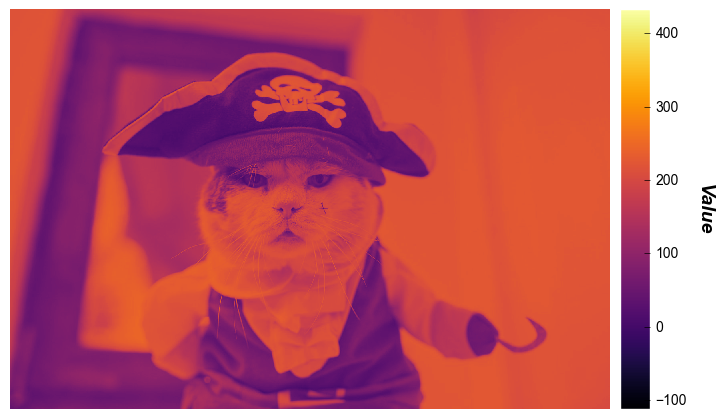

In [12]:
fcp.imshow(img_raw, cmap='inferno', cbar=True, ax_size=[600, 600], stretch=4)

Now we show a single-sided stretch that applies a 3 * std dev increase to the upper z-limit:

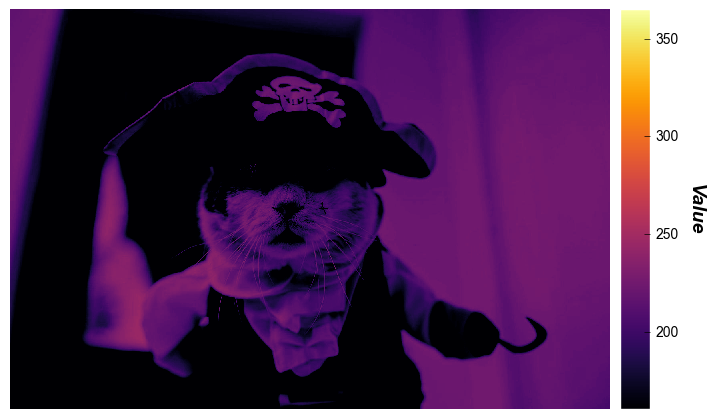

In [13]:
fcp.imshow(img_raw, cmap='inferno', cbar=True, ax_size=[600, 600], stretch=[0, 3])

## Split color planes

This section applies only to single-channel image data
<br><br>

When analyzing Bayer-type images, it is often useful to split the image data based on the color-filter array pattern used on the image sensor.  <b>fivecentplots</b> provides a simple utility function to do this and `imshow` can be used to display the result.  Consider the following image:

<img align="left" src="https://upload.wikimedia.org/wikipedia/commons/2/28/RGB_illumination.jpg">

First we read the image from the world-wide web and convert into a Bayer-like RAW image (rough hack for the purposes of this example):

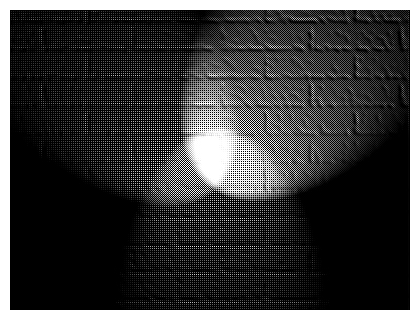

0    1    2    3    4    5    6    7    8    9    ...  390  391  392  \
0      0    0    0    0    0    0    0    1    0    0  ...    0   45    1   
1      0   32    0   34    0   20    0   24    1   32  ...   42    0   43   
2      0    0    0    0    0    0    0    1    0    0  ...    1   43    0   
3      0   44    0   57    0   40    1   24    0   40  ...   44    0   48   
4      0    1    0    0    0    1    0    0    0    1  ...    2   44    0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
295    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
296    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
297    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
298    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
299    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   

     393  394  395  396  397  398  399  
0     43    0   46    0   34    1    1  
1      0   40    0   38    2   67    0  
2     45    2   42    1   36    1    0  
3      0   42    0   39    0   70    0  
4     50    0   50    0   40    3    0  
..   ...  ...  ...  ...  ...  ...  ...  
295    0    0    0    0    0    5    0  
296    0    0    0    0    0    7    0  
297    0    0    0    0    0    7    0  
298    0    0    0    0    0    7    0  
299    0    0    0    0    0    7    0  

[300 rows x 400 columns]

In [14]:
url = 'https://upload.wikimedia.org/wikipedia/commons/2/28/RGB_illumination.jpg'
img_rgb_sp = imageio.imread(url)
img_raw_sp = fcp.utilities.rgb2bayer(img_rgb_sp)
fcp.imshow(img_raw_sp) 
img_raw_sp

`fcp.imshow` has a built-in hook to separate RAW single-channel data into discrete color planes if the CFA pattern of the RAW data is supplied with the keyword `cfa`.  This automatically creates a new column within the `DataFrame` called "Plane".  We can then group the color plane data into separate subplots for visualization.  

<div class="admonition note">
<p class="admonition-title"></p>
<p>Caution: 
    
Only CFAs with a 2x2 grid of colors is supported

</div>

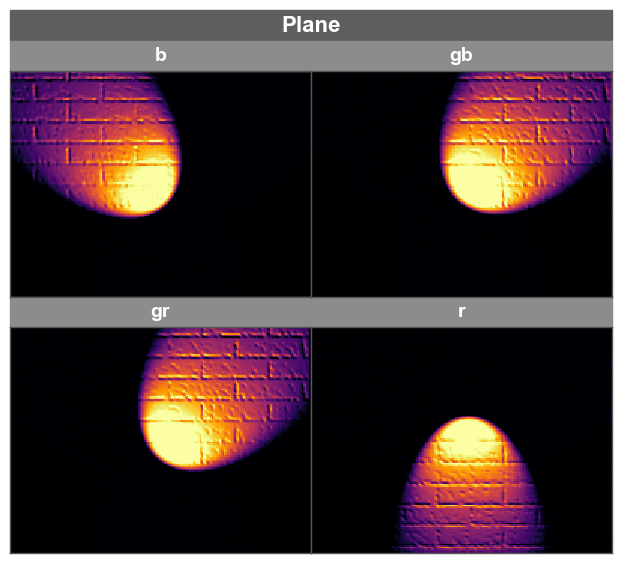

In [15]:
fcp.imshow(img_raw_sp, cmap='inferno', ax_size=[300, 300], cfa='rggb', wrap='Plane', ax_edge_width=1, ax_edge_color='#555555')

## Grouped Images

As explained above, to enable fivecentplots powerful grouping / filtering / automatic-color-plane-splitting functionality for sets of images, we have to transform the input data under the hood into a move convenient format. The specifics of this format are explained below and tricks for preparing the input `DataFrame` for `fcp.imshow` are provided.

### Format

Image data is transformed behind the scenes from 2D single-channel or 2D multi-channel data using `fcp.utilities.img_df_transform`.  In addition to reformatting the data into an easier-to-process format, it also helps minimize needless grouping label data which can slow plotting and consume excessive memory.  The output of this function is a tuple containing:

1. a `DataFrame` containing all non-integer grouping columns (without repeats) and the shape of the array and number of channels for each pixel. The index value of each row in this table links to the actual pixel data which is part of the second value in this tuple

2. `dict` of `DataFrames` with the actual image data. The image data is decomposed into columnar data containing the `Row` / `Column` location in the 2D array and the pixel value &rarr; for single-channel data, this is found in a column named `Value`; for multi-channel data it is broken into separate columns for the `R`, `G`, `B`, and (if included) `A` or alpha channel. The dictionary key matches the index number from the first value in this tuple

#### RAW format

Consider the RAW image data plotted above.  Because we have only one image with no grouping labels, the first `DataFrame` is only 1 row with the shape and number of pixel channels = 1:

In [16]:
df_groups, df_dict = fcp.utilities.img_df_transform(img_raw)
df_groups

rows  cols  channels
0  1000  1500         1

The image data `dict` is shown below:

In [17]:
df_dict

{0:             Value  Row  Column
 0        216.9074    0       0
 1        216.9074    0       1
 2        216.9074    0       2
 3        216.9074    0       3
 4        216.9074    0       4
 ...           ...  ...     ...
 1499995  204.9795  999    1495
 1499996  204.9795  999    1496
 1499997  204.9795  999    1497
 1499998  204.9795  999    1498
 1499999  204.9795  999    1499
 
 [1500000 rows x 3 columns]}

#### RGB format

Consider the RGB image data plotted above.  Because we have only one image with no grouping labels, the first `DataFrame` is again only 1 row with the shape and number of pixel channels = 3:

In [18]:
df_groups, df_dict = fcp.utilities.img_df_transform(img_rgb)
df_groups

rows  cols  channels
0  1000  1500         3

Unlike the RAW image, the RGB image data has three "value" columns along with the `Row` / `Column` coordinates:

In [19]:
df_dict

{0:            R    G    B  Row  Column
 0        216  217  219    0       0
 1        216  217  219    0       1
 2        216  217  219    0       2
 3        216  217  219    0       3
 4        216  217  219    0       4
 ...      ...  ...  ...  ...     ...
 1499995  205  205  205  999    1495
 1499996  205  205  205  999    1496
 1499997  205  205  205  999    1497
 1499998  205  205  205  999    1498
 1499999  205  205  205  999    1499
 
 [1500000 rows x 5 columns]}

### Grouping Columns

To take full advantage of `fcp.imshow`, we need the ability to label and aggregate multiple images together.  As with other <b>fivecentplots</b> plot types, labels are provided using "grouping columns" that are associated with subsets of a larger data set.  This section contains recommendations for how to manually create labeled single- or multi-image DataFrames for both RAW-like and RGB-like images.

#### Single grouping column:  RAW

First, let's add a grouping column named "Case" to the `img_raw` `DataFrame` used above.  Because our starting point here is already a 2D `DataFrame`, we simply add a new column directly via the standard pandas approach.  The name of this column can then be specified as one of the many grouping / filtering `kwargs` in an `fcp.imshow` function call.

To illustrate what is happening behind-the-scenes, we will manually executate the data transformation using `fcp.utilities.img_df_transform` (or shorthand `fcp.utl.img_df_transform`).  Notice that the label value is included in the grouping `DataFrame` instead of the actual image `DataFrame` within the image data `dict`.  This approach minimizes the amount of memory consumed by avoiding unnecessary string repetition and speeds up the `DataFrame` manipulation steps.

In [20]:
img_raw2 = img_raw.copy()
img_raw2['Case'] = 'Original'
df_groups, df_dict = fcp.utl.img_df_transform(img_raw2)
df_groups

rows  cols  channels      Case
0  1000  1500         1  Original

In [21]:
df_dict

{0:             Value  Row  Column
 0        216.9074    0       0
 1        216.9074    0       1
 2        216.9074    0       2
 3        216.9074    0       3
 4        216.9074    0       4
 ...           ...  ...     ...
 1499995  204.9795  999    1495
 1499996  204.9795  999    1496
 1499997  204.9795  999    1497
 1499998  204.9795  999    1498
 1499999  204.9795  999    1499
 
 [1500000 rows x 3 columns]}

<div class="admonition note">
<p class="admonition-title"></p>
<p>Caution: 
    
While `fcp.imshow` can handle an `numpy.ndarray` input object, this only works if there are no grouping columns included or if all array data types are properly adjusted.  The best practice is to convert the array manually to a `DataFrame` first and then add grouping columns
    
    
</div>

<br> Let's explore what happens if we start with a `numpy.ndarray`:

In [22]:
# Convert the dataframe to an array
img_raw_as_array = img_raw.to_numpy()
img_raw_as_array

array([[216.9074, 216.9074, 216.9074, ..., 212.2669, 212.2669, 212.2669],
       [216.9074, 216.9074, 216.9074, ..., 212.2669, 212.2669, 212.2669],
       [216.9074, 216.9074, 216.9074, ..., 211.267 , 211.267 , 211.267 ],
       ...,
       [ 46.9863,  46.9863,  45.9864, ..., 204.9795, 204.9795, 204.9795],
       [ 47.9862,  47.9862,  46.9863, ..., 204.9795, 204.9795, 204.9795],
       [ 47.9862,  47.9862,  47.9862, ..., 204.9795, 204.9795, 204.9795]])

Since we have no grouping columns in our `numpy.ndarray` the transform works (but this is only useful for single, unlabeled images)!  

In [23]:
fcp.utl.img_df_transform(img_raw_as_array)

(   rows  cols  channels
 0  1000  1500         1,
 {0:             Value  Row  Column
  0        216.9074    0       0
  1        216.9074    0       1
  2        216.9074    0       2
  3        216.9074    0       3
  4        216.9074    0       4
  ...           ...  ...     ...
  1499995  204.9795  999    1495
  1499996  204.9795  999    1496
  1499997  204.9795  999    1497
  1499998  204.9795  999    1498
  1499999  204.9795  999    1499
  
  [1500000 rows x 3 columns]})

We can convert the arrary to `DataFrame`, then add grouping column &rarr; works!

In [24]:
img_raw_as_df = pd.DataFrame(img_raw_as_array)
img_raw_as_df['new grouping column'] = 'boom!'
df_groups, df_dict = fcp.utl.img_df_transform(img_raw_as_df)
df_groups

rows  cols  channels new grouping column
0  1000  1500         1               boom!

In [25]:
df_dict

{0:             Value  Row  Column
 0        216.9074    0       0
 1        216.9074    0       1
 2        216.9074    0       2
 3        216.9074    0       3
 4        216.9074    0       4
 ...           ...  ...     ...
 1499995  204.9795  999    1495
 1499996  204.9795  999    1496
 1499997  204.9795  999    1497
 1499998  204.9795  999    1498
 1499999  204.9795  999    1499
 
 [1500000 rows x 3 columns]}

If we add a label column directly to the `numpy.ndarray` and try to transform, it does not work because insertion of a string column screws up the pixel value data type! 

In [26]:
img_raw_as_array2 = img_raw_as_array.copy()
group_col = np.array(['boom!'] * img_raw_as_array2.shape[0]).reshape(img_raw_as_array2.shape[0], 1)
img_raw_as_array2 = np.append(img_raw_as_array2, group_col, 1)
img_raw_as_array2

array([['216.9074', '216.9074', '216.9074', ..., '212.2669', '212.2669',
        'boom!'],
       ['216.9074', '216.9074', '216.9074', ..., '212.2669', '212.2669',
        'boom!'],
       ['216.9074', '216.9074', '216.9074', ..., '211.267', '211.267',
        'boom!'],
       ...,
       ['46.98629999999999', '46.98629999999999', '45.9864', ...,
        '204.9795', '204.9795', 'boom!'],
       ['47.986200000000004', '47.986200000000004', '46.98629999999999',
        ..., '204.9795', '204.9795', 'boom!'],
       ['47.986200000000004', '47.986200000000004', '47.986200000000004',
        ..., '204.9795', '204.9795', 'boom!']], dtype='<U32')

In [27]:
fcp.utl.img_df_transform(img_raw_as_array2)

ValueError: Image array can only contain numeric data

Even if we convert the array with label column to a DataFrame it fails because the array columns are unlabeled and the grouping column data gets treated like pixel data!

In [28]:
img_raw_array_to_df = pd.DataFrame(img_raw_as_array2)
fcp.utl.img_df_transform(img_raw_array_to_df)

(   rows  cols  channels
 0  1000  1501         1,
 {0:             Value  Row  Column
  0        216.9074    0       0
  1        216.9074    0       1
  2        216.9074    0       2
  3        216.9074    0       3
  4        216.9074    0       4
  ...           ...  ...     ...
  1500995  204.9795  999    1496
  1500996  204.9795  999    1497
  1500997  204.9795  999    1498
  1500998  204.9795  999    1499
  1500999     boom!  999    1500
  
  [1501000 rows x 3 columns]})

Therefore, for multi-image situations it is recommended to first convert the array to a `DataFrame` and then add grouping label columns

#### Single column:  RGB

RGB images are a more cumbersome to deal with because each pixel has 3-4 values (R, G, B, and optional transparency).  To illustrate, if we follow the same pattern described for RAW images (i.e., convert to `DataFrame` and add grouping columns), it fails because `pandas` doesn't like the input data shape

In [29]:
img_rgb_df = pd.DataFrame(img_rgb)
img_rgb_df['Case'] = 'Original'
df_groups, df_dict = fcp.utl.img_df_transform(img_rgb_df)
df_groups

ValueError: Must pass 2-d input. shape=(1000, 1500, 3)

The preferred approach for adding grouping columns to RGB images is to first transform into the `fcp.imshow` format and then add grouping columns to the grouping table:

In [30]:
df_groups, df_dict = fcp.utl.img_df_transform(img_rgb)
df_groups['case'] = 'original'
df_groups

rows  cols  channels      case
0  1000  1500         3  original

The dictionary of image data doesn't need any adjustment since grouping values are linked between the row index of the grouping table and the key of the `dict`:

In [31]:
df_dict

{0:            R    G    B  Row  Column
 0        216  217  219    0       0
 1        216  217  219    0       1
 2        216  217  219    0       2
 3        216  217  219    0       3
 4        216  217  219    0       4
 ...      ...  ...  ...  ...     ...
 1499995  205  205  205  999    1495
 1499996  205  205  205  999    1496
 1499997  205  205  205  999    1497
 1499998  205  205  205  999    1498
 1499999  205  205  205  999    1499
 
 [1500000 rows x 5 columns]}

#### Multiple images: RAW

For RAW single channel images, the simplest approach to aggregate multiple labeled images is:

1. convert each image to a `DataFrame` 
2. add grouping columns to each image `DataFrame` 
3. `pd.concat` them into a single `DataFrame`

In [32]:
img_raw_regular = img_raw.copy()
img_raw_regular['Case'] = 'Original'

img_raw_inverse = (1 - img_raw / 255) * 255
img_raw_inverse['Case'] = 'Inverse'

img_all = pd.concat([img_raw_regular, img_raw_inverse])
img_all

0         1         2         3         4         5         6  \
0    216.9074  216.9074  216.9074  216.9074  216.9074  216.9074  216.9074   
1    216.9074  216.9074  216.9074  216.9074  216.9074  216.9074  216.9074   
2    216.9074  216.9074  216.9074  216.9074  216.9074  216.9074  216.9074   
3    216.9074  216.9074  216.9074  216.9074  216.9074  216.9074  216.9074   
4    216.9074  216.9074  216.9074  216.9074  216.9074  216.9074  216.9074   
..        ...       ...       ...       ...       ...       ...       ...   
995  209.0136  209.0136  209.0136  209.0136  209.0136  209.0136  209.0136   
996  209.0136  209.0136  209.0136  209.0136  209.0136  209.0136  209.0136   
997  208.0137  208.0137  209.0136  209.0136  209.0136  209.0136  209.0136   
998  207.0138  207.0138  208.0137  208.0137  209.0136  209.0136  209.0136   
999  207.0138  207.0138  207.0138  208.0137  208.0137  209.0136  209.0136   

            7         8         9  ...      1491      1492      1493  \
0    216.9074  216.9074  216.9074  ...  211.2670  212.2669  213.2668   
1    216.9074  216.9074  216.9074  ...  212.2669  212.2669  213.2668   
2    216.9074  216.9074  216.9074  ...  212.2669  213.2668  213.2668   
3    216.9074  216.9074  216.9074  ...  212.2669  213.2668  213.2668   
4    216.9074  216.9074  216.9074  ...  213.2668  213.2668  213.2668   
..        ...       ...       ...  ...       ...       ...       ...   
995  209.0136  207.0138  205.0140  ...   50.0205   50.0205   50.0205   
996  209.0136  208.0137  207.0138  ...   50.0205   50.0205   50.0205   
997  210.0135  208.0137  207.0138  ...   50.0205   50.0205   50.0205   
998  209.0136  207.0138  207.0138  ...   50.0205   50.0205   50.0205   
999  209.0136  207.0138  207.0138  ...   50.0205   50.0205   50.0205   

         1494      1495      1496      1497      1498      1499      Case  
0    213.2668  214.2667  212.2669  212.2669  212.2669  212.2669  Original  
1    213.2668  214.2667  212.2669  212.2669  212.2669  212.2669  Original  
2    213.2668  214.2667  211.2670  211.2670  211.2670  211.2670  Original  
3    213.2668  214.2667  211.2670  211.2670  211.2670  211.2670  Original  
4    213.2668  213.2668  211.2670  211.2670  211.2670  211.2670  Original  
..        ...       ...       ...       ...       ...       ...       ...  
995   50.0205   50.0205   50.0205   50.0205   50.0205   50.0205   Inverse  
996   50.0205   50.0205   50.0205   50.0205   50.0205   50.0205   Inverse  
997   50.0205   50.0205   50.0205   50.0205   50.0205   50.0205   Inverse  
998   50.0205   50.0205   50.0205   50.0205   50.0205   50.0205   Inverse  
999   50.0205   50.0205   50.0205   50.0205   50.0205   50.0205   Inverse  

[2000 rows x 1501 columns]

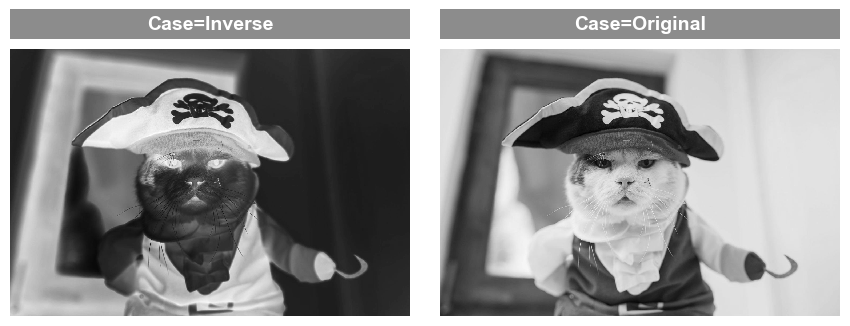

In [33]:
fcp.imshow(img_all, col='Case')

For many images, we can take advantage of loops with this method:

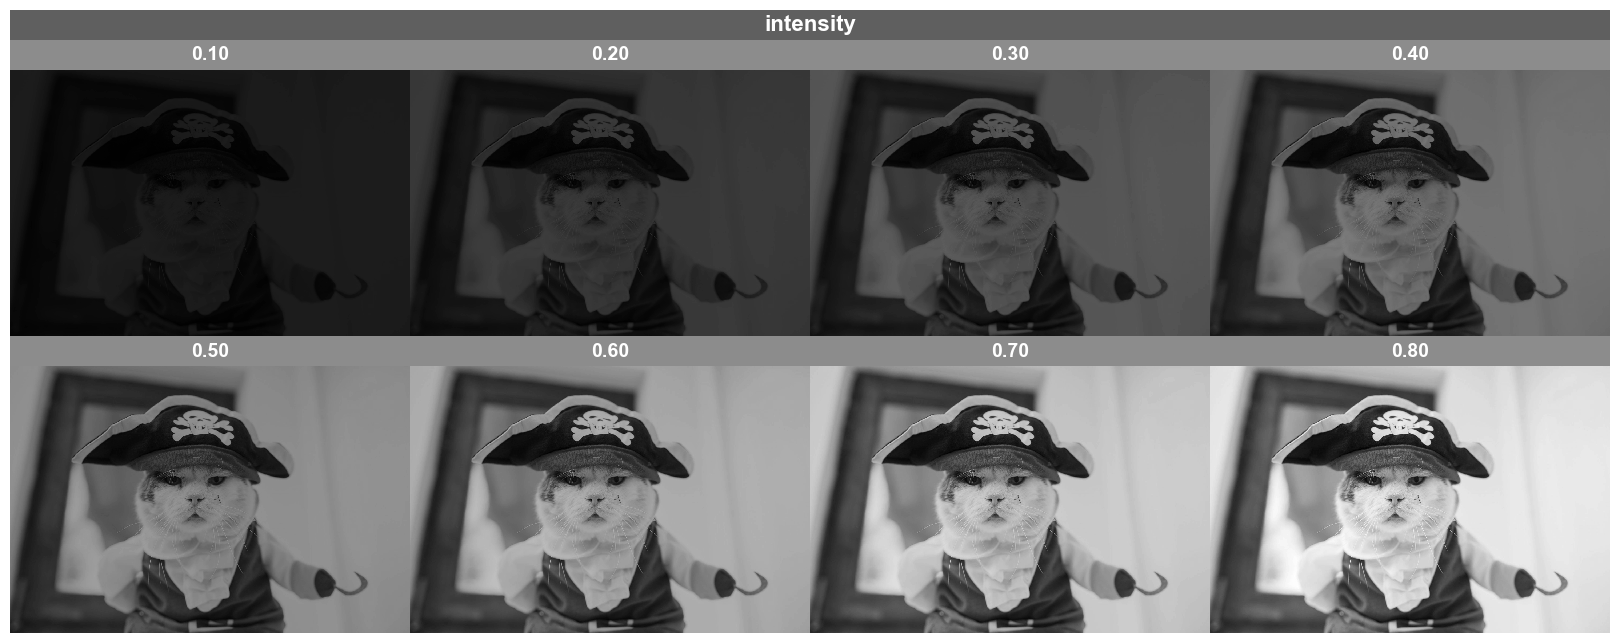

In [34]:
img_all = pd.DataFrame()
intensities = np.linspace(0.1, 0.8, 8)
for intensity in intensities:
    temp = pd.DataFrame(intensity * img_raw)
    temp['intensity'] = '%.2f' % intensity
    img_all = pd.concat([img_all, temp])
    
fcp.imshow(img_all, wrap='intensity', ncol=4)

#### Multiple images:  RGB

For RGB images, we need to convert the arrays into the `fcp.imshow` format <i>first</i>.  We can then take these reformated `DataFrames` and either: 

1. add grouping labels to each `DataFrame` of image data and concatenate them into a single `DataFrame` that is re-processed automatically through `fcp.utilities.img_df_transform` as part of the `fcp.imshow` call <b>OR</b>
2. add grouping labels to the grouping `DataFrames`, concatenate, and reindex and combine the image data into a common dictionary with keys that match the row index in the grouping table (this is the more memory efficient option)

<b>Option 1:  one big table</b>

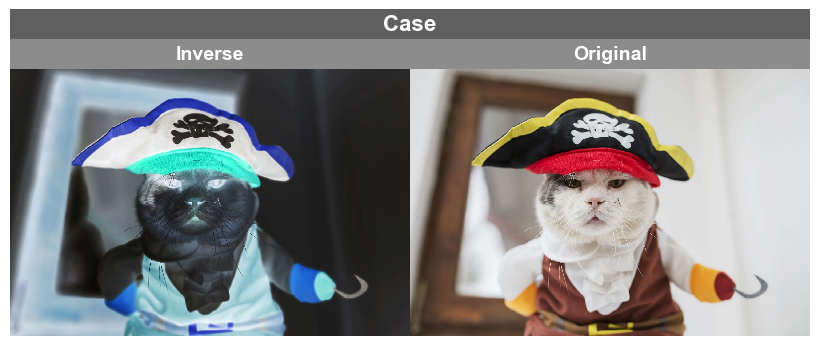

In [35]:
img_rgb_regular = img_rgb.copy()
img_rgb_inverse = (1 - img_rgb_regular / 255) * 255

img_rgb_regular = fcp.utilities.img_df_transform(img_rgb_regular)[1][0]  # get the second item of the tuple (the dict) and key 0
img_rgb_regular['Case'] = 'Original'

img_rgb_inverse = fcp.utilities.img_df_transform(img_rgb_inverse)[1][0]  # get the second item of the tuple (the dict) and key 0
img_rgb_inverse['Case'] = 'Inverse'

img_all = pd.concat([img_rgb_regular, img_rgb_inverse])
fcp.imshow(img_all, wrap='Case')

<b>Option2: build on the outputs of `fcp.utilities.img_df_transform`</b>

In [36]:
img_rgb_regular = img_rgb.copy()
img_rgb_inverse = (1 - img_rgb_regular / 255) * 255

# Transform the data
df_groups, df_dict = fcp.utilities.img_df_transform(img_rgb_regular)
df_groups2, df_dict2 = fcp.utilities.img_df_transform(img_rgb_inverse)

# Add grouping columns to the grouping dataframe
df_groups['Case'] = 'Original'
df_groups2['Case'] = 'Inverse'

# Merge the grouping tables and update the index
df_groups = pd.concat([df_groups, df_groups2])
df_groups.index = [0, 1]

# Combine the image dicts
df_dict[1] = df_dict2[0]

df_groups

rows  cols  channels      Case
0  1000  1500         3  Original
1  1000  1500         3   Inverse

In [37]:
df_dict

{0:            R    G    B  Row  Column
 0        216  217  219    0       0
 1        216  217  219    0       1
 2        216  217  219    0       2
 3        216  217  219    0       3
 4        216  217  219    0       4
 ...      ...  ...  ...  ...     ...
 1499995  205  205  205  999    1495
 1499996  205  205  205  999    1496
 1499997  205  205  205  999    1497
 1499998  205  205  205  999    1498
 1499999  205  205  205  999    1499
 
 [1500000 rows x 5 columns],
 1:             R     G     B  Row  Column
 0        39.0  38.0  36.0    0       0
 1        39.0  38.0  36.0    0       1
 2        39.0  38.0  36.0    0       2
 3        39.0  38.0  36.0    0       3
 4        39.0  38.0  36.0    0       4
 ...       ...   ...   ...  ...     ...
 1499995  50.0  50.0  50.0  999    1495
 1499996  50.0  50.0  50.0  999    1496
 1499997  50.0  50.0  50.0  999    1497
 1499998  50.0  50.0  50.0  999    1498
 1499999  50.0  50.0  50.0  999    1499
 
 [1500000 rows x 5 columns]}

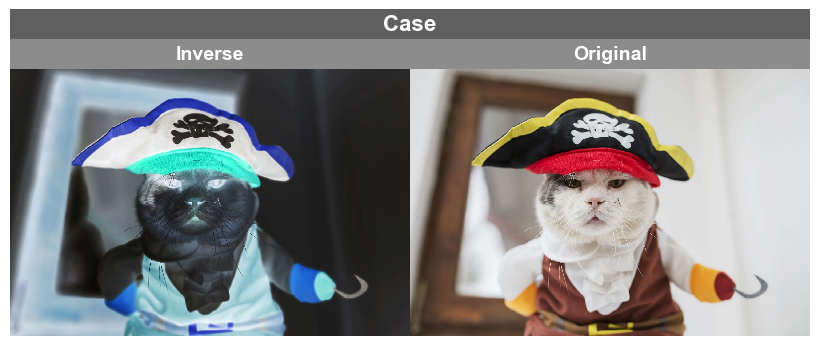

In [38]:
fcp.imshow((df_groups, df_dict), wrap='Case')